In [1]:
import pandas as pd


In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
#1.Replace Nan value with correct value.

In [5]:
dataset["salary"].fillna(0,inplace=True)

C:\Users\mdfai\AppData\Local\Temp\ipykernel_12916\2080798296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [6]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
#2.How many of them are not placed?

In [8]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
not_placed=dataset[dataset["status"]=="Not Placed"]

In [10]:
len(not_placed)

67

In [11]:
#3.Find the reason for non-placement from the dataset?

In [12]:
#We require additional data, particularly related to the job interview process, as our current dataset does not provide sufficient information to determine the reasons for non-placement.

In [13]:
#4.What kind of relation between salary and mba_p?

In [14]:
from Univariate import Univariate

In [15]:
qual,quan=Univariate.qualQuan(dataset)

In [16]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [17]:
#correlation between salary and mba_p is 0.139823. This is positive correlation with 13%

In [18]:
#5.Which specialization is getting minimum salary?

In [19]:
min_salary_row = dataset.loc[dataset['salary'].idxmin()]  
min_specialization = min_salary_row['specialisation']
min_salary = min_salary_row['salary']

print(f"The specialisation getting the minimum salary is {min_specialization} with a salary of {min_salary}.")

The specialisation getting the minimum salary is Mkt&HR with a salary of 0.0.


In [20]:
#6.How many of them getting above 500000 salary?

In [21]:
salary_500k=dataset[dataset["salary"]>500000]

In [22]:
total_above_500k=salary_500k.shape[0]

In [23]:
print(f' The number of people with salary above 500000 is {total_above_500k}')

 The number of people with salary above 500000 is 3


In [24]:
#7.Test the Analysis of varaince  between etest_p and mba_p at significance level 5%.

In [25]:
import scipy.stats as stats

In [26]:
stats.f_oneway(dataset["etest_p"],dataset["mba_p"])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [27]:
#Reject null hypothesis p<0.05
#Accept Null hypothesis and reject alternate hypothesis.

In [28]:
#8.Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.

In [29]:
#Unpaired T-test: Independent sample

In [30]:
from scipy.stats import ttest_ind
degree_t=dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree_t,specialisation)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [31]:
#Reject null hypothesis p<0.05
#Accept Null hypothesis and reject alternate hypothesis.

In [32]:
#9.Convert the normal distribution to standard normal distribution for salary column

D:\AI and Data science course\5.Data Science\3.Assignment\Univariate.py:90: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


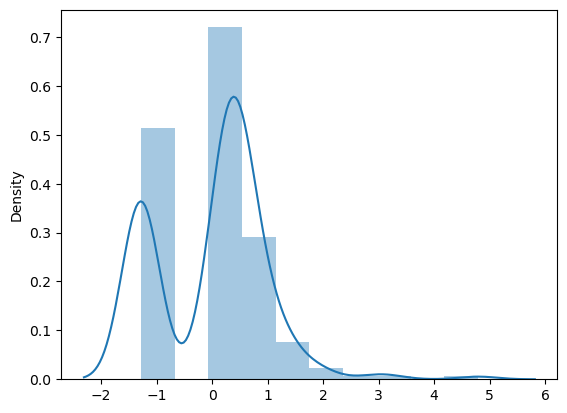

In [33]:
Univariate.stdNDgraph(dataset['salary'])

In [34]:
#10. What is the probability Density Function of the salary range from 700000 to 900000?

D:\AI and Data science course\5.Data Science\3.Assignment\Univariate.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'Yellow'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974901


0.0005973310593974901

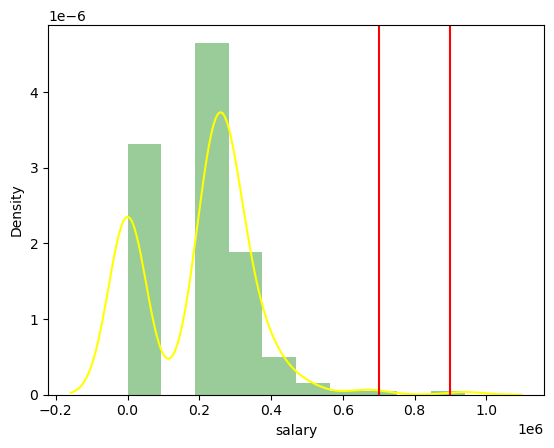

In [35]:
Univariate.get_pdf_probability(dataset['salary'],700000,900000)

In [36]:
#The probability Density Function of the salary range from 700000 to 900000 is 0.05% .

In [37]:
#11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.

In [38]:
#Paired T-test: Dependent sample

In [39]:
from scipy.stats import ttest_rel
etest=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest,mba)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

In [40]:
#Reject null hypothesis p<0.05
#Accept Null hypothesis and reject alternate hypothesis.

In [41]:
#12)Which parameter is highly correlated with salary?

In [42]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [43]:
#ssc_p(54%) is highly correlated with salary.

In [44]:
#13. plot any useful graph and explain it.

C:\Users\mdfai\AppData\Local\Temp\ipykernel_12916\3082704077.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ssc_p'])


<Axes: xlabel='ssc_p', ylabel='Density'>

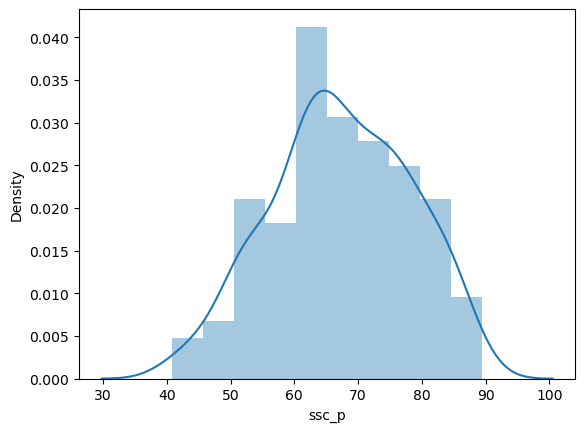

In [45]:
import seaborn as sns
sns.distplot(dataset['ssc_p'])

In [46]:
#Histogram: The bars show how frequently the data points occur in each bin.
#The smooth curve estimates the probability density of the data.